In [1]:
import time
import csv
import pandas as pd
from scapy.all import *

In [ ]:
# Reference - https://github.com/fisher85/ml-cybersecurity/blob/master/python-web-attack-detection/web-attack-detection.ipynb

In [3]:
# Compiling classical ML models on the engineered CSV file named Wednesday-workingHours.csv

In [6]:
# Change this based on CSV file location
csv_file = 'C:/Users/sinja/OneDrive/Desktop/submit/Wednesday-workingHours.csv'

file = pd.read_csv(csv_file)
file = file[file[' Label'].isin(['BENIGN', 'DoS GoldenEye', 'Heartbleed'])]

print(file)

         Destination Port   Flow Duration   Total Fwd Packets  \
0                      80           38308                   1   
1                     389             479                  11   
2                      88            1095                  10   
3                     389           15206                  17   
4                      88            1092                   9   
...                   ...             ...                 ...   
692698                 53           32215                   4   
692699                 53             324                   2   
692700              58030              82                   2   
692701                 53         1048635                   6   
692702                 53           94939                   4   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             1                            6   
1                             5                          172   
2                          

In [8]:
from sklearn.utils import resample

benign = file[file[' Label'] == 'BENIGN']
dos_goldeneye = file[file[' Label'] == 'DoS GoldenEye']
heartbleed = file[file[' Label'] == 'Heartbleed']

target_benign_count = 20586

benign_downsampled = benign.sample(target_benign_count, random_state = 1)

target_heartbleed_count = target_benign_count // 2

heartbleed_upsampled = resample(heartbleed, replace = True, 
                                n_samples = target_heartbleed_count, random_state = 1)

file = pd.concat([benign_downsampled, dos_goldeneye, heartbleed_upsampled])

print("File columns:")
print(file.columns)

print("\nData value counts:")
print(file[' Label'].value_counts())

File columns:
Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Lengt

In [9]:
import numpy as np

# Replacing non-numerical values
file.replace('Infinity', -1, inplace = True)

# Replacing NaN and Infinite values with -1
file.replace([np.inf, -np.inf, np.nan], -1, inplace = True)

# Performing one-hot encoding for string columns
string_features = list(file.select_dtypes(include = ['object']).columns)
string_features.remove(' Label')
file = pd.get_dummies(file, columns = string_features, drop_first = True)

In [10]:
# Extracting 'Label' as 'y'
y = file[' Label'].values

# Extracting remaining columns as 'x'
x = file.drop(columns = [' Label'])

print("Before Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

Before Scaling:

Y Values:
['BENIGN' 'BENIGN' 'BENIGN' ... 'Heartbleed' 'Heartbleed' 'Heartbleed']

X Values:
         Destination Port   Flow Duration   Total Fwd Packets  \
4104                   80          261686                   1   
653841                 53             165                   2   
458764                443          334914                   7   
486898                 53           24054                   1   
59038               56082              47                   1   
...                   ...             ...                 ...   
597807                444       119299621                2805   
597825                444        24719667                 590   
597813                444       119296592                2797   
597510                444       119259886                2782   
597277                444       119297996                2782   

         Total Backward Packets  Total Length of Fwd Packets  \
4104                          1              

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fitting and transforming the features using Min-Max Scaling
x = scaler.fit_transform(x)

print("After Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

After Scaling:

Y Values:
['BENIGN' 'BENIGN' 'BENIGN' ... 'Heartbleed' 'Heartbleed' 'Heartbleed']

X Values:
[[1.23073136e-03 2.18072377e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.15359527e-04 1.37500448e-06 5.52819101e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.81517492e-03 2.79095909e-03 3.31691461e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.83055906e-03 9.94141506e-01 1.54568221e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.83055906e-03 9.93835622e-01 1.53738992e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.83055906e-03 9.94153206e-01 1.53738992e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [12]:
# Splitting the dataset by Train-Test Split (70% train set and 30% test set)

from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 42)

print("Y Train:")
print(y_train)
print("\nX Train:")
print(x_train)

print("\nY Test:")
print(y_test)
print("\nX Test:")
print(x_test)

# Converting to Pandas Series
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("\nY Train value counts:")
print(y_train_series.value_counts())
print("\nY Test value counts:")
print(y_test_series.value_counts())

Y Train:
['BENIGN' 'Heartbleed' 'Heartbleed' ... 'Heartbleed' 'BENIGN' 'BENIGN']

X Train:
[[5.68290206e-01 4.66668187e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.83055906e-03 9.93845888e-01 1.54402375e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.83055906e-03 9.93855030e-01 1.54291811e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.83055906e-03 9.94166748e-01 1.55010476e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.34100489e-01 1.07008682e-04 1.65845730e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.15359527e-04 1.47833815e-05 5.52819101e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]

Y Test:
['Heartbleed' 'DoS GoldenEye' 'Heartbleed' ... 'Heartbleed' 'BENIGN'
 'DoS GoldenEye']

X Test:
[[6.83055906e-03 9.93839030e-01 1.54236529e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23073136e-03 9.62191552e-02 4.42255281e-05 ... 0.00000000e+00
  5.45295000e-02 5.45295000e-02]
 [6.83

In [13]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

import seaborn as sn 

Time consumed to fit model is  580.9064130783081
The best parameter is:
{'max_depth': 15, 'max_features': 1, 'n_estimators': 150}
Classification Report for Test Set:
               precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      6172
DoS GoldenEye       1.00      1.00      1.00      3051
   Heartbleed       1.00      1.00      1.00      3129

     accuracy                           1.00     12352
    macro avg       1.00      1.00      1.00     12352
 weighted avg       1.00      1.00      1.00     12352



Text(0.5, 1.0, 'Confusion Matrix - Random Forest (Test Set)')

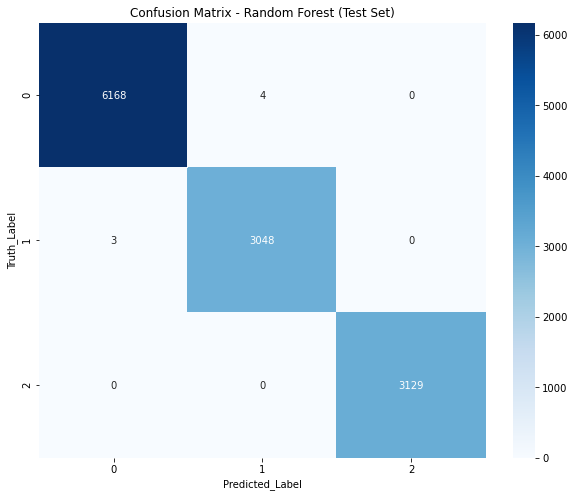

In [16]:
# Random Forest 

# Reference - https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

from sklearn.ensemble import RandomForestClassifier

# Calculating class weights
tot_samples = len(y_train)
benign_samples = len(y_train[y_train == 'BENIGN'])
dos_samples = len(y_train[y_train == 'DoS GoldenEye'])
heartbleed_samples = len(y_train[y_train == 'Heartbleed'])

class_weight_benign = tot_samples / (3 * benign_samples)
class_weight_dos = tot_samples / (3 * dos_samples)
class_weight_heartbleed = tot_samples / (3 * heartbleed_samples)

class_weights = {'BENIGN': class_weight_benign, 
                 'DoS GoldenEye': class_weight_dos, 
                 'Heartbleed': class_weight_heartbleed}

rfc = RandomForestClassifier(class_weight = class_weights, 
                             n_estimators = 100, 
                             max_depth = 20,
                             random_state = 4)

# Defining parameter range
param_grid = dict(max_features = np.arange(1, 4, 1), 
                  n_estimators = [50, 100, 150, 200], 
                  max_depth = np.arange(10, 30, 5))

# Parameter Description
# max_features = number of features to consider when looking for the best split
# n_estimators = number of trees in the forest

grid = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)

start = time.time()

# Fitting the model for grid search
grid.fit(x_train, y_train.ravel())

end = time.time()

print("Time consumed to fit model is ", end - start)

print("The best parameter is:")
print(grid.best_params_)

# Predictions on the test set
grid_predictions = grid.predict(x_test)

print("Classification Report for Test Set:")
print(classification_report(y_test.ravel(), grid_predictions, zero_division = 0))

# Plotting the Confusion Matrix for the test set
conf_matrix = confusion_matrix(y_test.ravel(), grid_predictions)
plt.figure(figsize = (10, 8))
sn.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Random Forest (Test Set)')

Time consumed to fit model is  33.54756283760071
The best parameter is:
{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Classification Report for Test Set:
               precision    recall  f1-score   support

       BENIGN       1.00      0.98      0.99      6172
DoS GoldenEye       0.95      0.99      0.97      3051
   Heartbleed       1.00      1.00      1.00      3129

     accuracy                           0.99     12352
    macro avg       0.98      0.99      0.99     12352
 weighted avg       0.99      0.99      0.99     12352



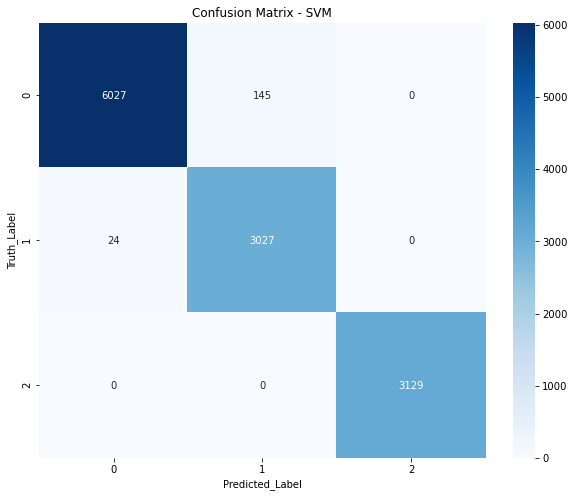

In [18]:
# SVM

# Reference - https://medium.com/swlh/hyperparameter-tuning-of-support-vector-machine-using-gridsearchcv-4d17671d1ed2

from sklearn.svm import SVC

# Calculating class weights
tot_samples = len(y_train)
benign_samples = len(y_train[y_train == 'BENIGN'])
dos_samples = len(y_train[y_train == 'DoS GoldenEye'])
heartbleed_samples = len(y_train[y_train == 'Heartbleed'])

class_weight_benign = tot_samples / (3 * benign_samples)
class_weight_dos = tot_samples / (3 * dos_samples)
class_weight_heartbleed = tot_samples / (3 * heartbleed_samples)

class_weights = {'BENIGN': class_weight_benign, 
                 'DoS GoldenEye': class_weight_dos, 
                 'Heartbleed': class_weight_heartbleed}

svc = SVC(class_weight = class_weights, random_state = 4)

# Defining parameter range
param_grid = {'C': [1],
              'gamma': [0.01],      
              'kernel': ['linear'],
             }

# Parameter Description
# C = governs the balance between maximizing the margin and minimizing classification errors
# gamma = influences the shape of the decision boundary

grid = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5)

start = time.time()

# Fitting the model for grid search
grid.fit(x_train, y_train.ravel())

end = time.time()

print("Time consumed to fit model is ", end - start)

print("The best parameter is:")
print(grid.best_params_)

# Predictions on the test set
grid_predictions = grid.predict(x_test)

print("Classification Report for Test Set:")
print(classification_report(y_test.ravel(), grid_predictions))

# Plotting the Confusion Matrix for the test set
conf_matrix = confusion_matrix(y_test.ravel(), grid_predictions)
plt.figure(figsize = (10, 8))
sn.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - SVM')
plt.show()

Time consumed to fit model is  216.68894004821777
Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.1}
               precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      6172
DoS GoldenEye       1.00      1.00      1.00      3051
   Heartbleed       1.00      1.00      1.00      3129

     accuracy                           1.00     12352
    macro avg       1.00      1.00      1.00     12352
 weighted avg       1.00      1.00      1.00     12352



Text(0.5, 1.0, 'Confusion Matrix - Vanilla Neural Network')

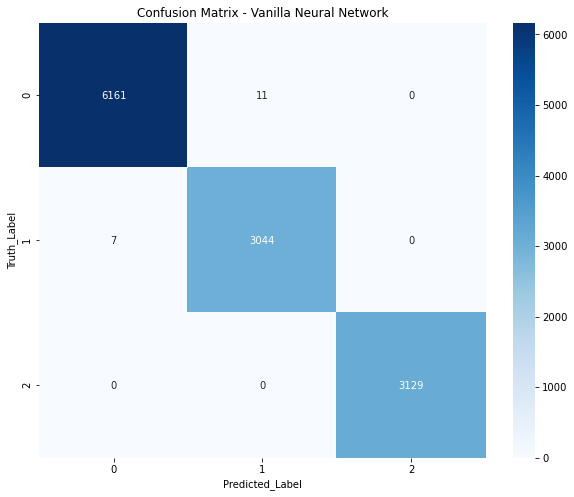

In [19]:
# Vanilla Neural Network 

# Reference - https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(random_state = 4)

param_grid_2 = {'learning_rate': ['constant','adaptive'], 
                'learning_rate_init': [0.1, 1],
                'hidden_layer_sizes': [(100,), (200,)],
                'activation': ['relu']}

# Parameter Description
# learning_rate = schedule for weight updates
# learning_rate_init = the initial learning rate used
#                      controls the step-size in updating the weights
#                      only used when solver is ’sgd’ or ‘adam’
# hidden_layer_sizes = the ith element represents the number of neurons in the ith hidden layer
# activation = activation function for the hidden layer

mlp = GridSearchCV(estimator = mlpc, param_grid = param_grid_2, cv = 5)

start_2 = time.time()

# Fitting the model for grid search
mlp.fit(x_train, y_train.ravel())

end_2 = time.time()

print("Time consumed to fit model is ", end_2 - start_2)

print('Best parameters found:\n', mlp.best_params_)

# Predictions on the test set
mlp_predictions = mlp.predict(x_test)

print(classification_report(y_test.ravel(), mlp_predictions))

# Plotting the Confusion Matrix
conf_matrix_2 = confusion_matrix(y_test.ravel(), mlp_predictions)
plt.figure(figsize = (10,8))
sn.heatmap(conf_matrix_2, annot = True, cmap = 'Blues',  fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Vanilla Neural Network')

In [ ]:
# Compiling DL models on a CSV file that combines PCAP data from Wednesday-WorkingHours.pcap
# with attack labels from an engineered CSV file named Wednesday-workingHours.csv

In [1]:
file = pd.read_csv('dataset_1.csv')
print(file)

             Timestamp      Source_IP   Destination_IP  Source_Port  \
0         1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
1         1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
2         1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
3         1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
4         1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
...                ...            ...              ...          ...   
13788873  1.499280e+09     172.16.0.1    192.168.10.51      45022.0   
13788874  1.499280e+09     172.16.0.1    192.168.10.51      45022.0   
13788875  1.499280e+09     172.16.0.1    192.168.10.51      45022.0   
13788876  1.499280e+09     172.16.0.1    192.168.10.51      45022.0   
13788877  1.499280e+09     172.16.0.1    192.168.10.51      45022.0   

          Destination_Port  Packet_Length Attack_Label  
0                   1900.0            179       BENIGN  
1                   1900.0       

In [2]:
print("File columns:")
print(file.columns)

print("\nData value counts:")
print(file['Attack_Label'].value_counts())

File columns:
Index(['Timestamp', 'Source_IP', 'Destination_IP', 'Source_Port',
       'Destination_Port', 'Packet_Length', 'Attack_Label'],
      dtype='object')

Data value counts:
BENIGN           9642001
DoS GoldenEye    4118430
Heartbleed         28447
Name: Attack_Label, dtype: int64


In [3]:
# Specifying the target total size
target_size = 100000

# Obtaining unique class labels
unique_labels = file['Attack_Label'].unique()

# Creating an empty dataframe to store the downsampled data
downsampled_data = pd.DataFrame()

# Iterating over each class label
for label in unique_labels:
    # Obtaining the rows for the current class
    class_data = file[file['Attack_Label'] == label]
    
    # Calculating the number of samples to keep for this class
    class_size = int(target_size * len(class_data) / len(file))
    
    # Downsampling the class
    downsampled_class = class_data.sample(class_size, random_state = 42)  
    
    # Appending the downsampled class to the new dataframe
    downsampled_data = pd.concat([downsampled_data, downsampled_class], axis = 0)

print(downsampled_data['Attack_Label'].value_counts())

BENIGN           69925
DoS GoldenEye    29867
Heartbleed         206
Name: Attack_Label, dtype: int64


In [4]:
downsampled_data.to_csv("balanced (multiclass).csv", index = False)

In [2]:
file = pd.read_csv('balanced (multiclass).csv')

In [3]:
import numpy as np

# Replacing non-numerical values
file.replace('Infinity', -1, inplace = True)

# Replacing NaN and Infinity values with -1
file.replace([np.inf, -np.inf, np.nan], -1, inplace = True)

# Performing one-hot encoding for string columns
string_features = list(file.select_dtypes(include = ['object']).columns)
string_features.remove('Attack_Label')
file = pd.get_dummies(file, columns = string_features, drop_first = True)

In [4]:
# Extracting 'Attack_Label' as 'y'
y = file['Attack_Label'].values

# Extracting remaining columns as 'x'
x = file.drop(columns = ['Timestamp', 'Attack_Label'])

print("Before Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

Before Scaling:

Y Values:
['BENIGN' 'BENIGN' 'BENIGN' ... 'Heartbleed' 'Heartbleed' 'Heartbleed']

X Values:
       Source_Port  Destination_Port  Packet_Length  Source_IP_1.234.58.131  \
0             80.0           46830.0           5858                       0   
1             80.0           49533.0           1514                       0   
2          47968.0             443.0             97                       0   
3          48967.0             443.0             66                       0   
4             80.0           49772.0           1514                       0   
...            ...               ...            ...                     ...   
99993      45022.0             444.0             66                       0   
99994      45022.0             444.0             66                       0   
99995      45022.0             444.0             66                       0   
99996      45022.0             444.0             66                       0   
99997      45022.0   

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fitting and transforming the features using Min-Max Scaling
x = scaler.fit_transform(x)

print("After Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

After Scaling:

Y Values:
['BENIGN' 'BENIGN' 'BENIGN' ... 'Heartbleed' 'Heartbleed' 'Heartbleed']

X Values:
[[1.23596191e-03 7.15031682e-01 2.64821412e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23596191e-03 7.56302008e-01 6.64108888e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.31948853e-01 6.77914345e-03 1.68996072e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.86996460e-01 6.79441179e-03 2.74047684e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.86996460e-01 6.79441179e-03 2.74047684e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.86996460e-01 6.79441179e-03 2.74047684e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [6]:
# Splitting the dataset by Train-Test Split (70% train set and 30% test set)

from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 42)

print("Y Train:")
print(y_train)
print("\nX Train:")
print(x_train)

print("\nY Test:")
print(y_test)
print("\nX Test:")
print(x_test)

# Converting to Pandas Series
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("\nY Train value counts:")
print(y_train_series.value_counts())
print("\nY Test value counts:")
print(y_test_series.value_counts())

Y Train:
['DoS GoldenEye' 'BENIGN' 'BENIGN' ... 'DoS GoldenEye' 'BENIGN' 'BENIGN']

X Train:
[[7.22885132e-01 1.23673563e-03 6.39444597e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23596191e-03 7.56302008e-01 1.33095825e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23596191e-03 7.53324681e-01 2.64821412e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [7.55828857e-01 1.23673563e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23596191e-03 8.31926101e-01 2.74047684e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23596191e-03 7.58424307e-01 1.33095825e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]

Y Test:
['BENIGN' 'BENIGN' 'BENIGN' ... 'BENIGN' 'BENIGN' 'DoS GoldenEye']

X Test:
[[6.77490234e-03 8.86831056e-01 6.64108888e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23596191e-03 6.93869761e-01 6.64108888e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.45748901e-01 6.77914

In [7]:
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, Dense
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

In [8]:
# Defining the fixed sequence length
sequence_length = 2

# Reshaping the data into sequences with the specified sequence length
def create_sequences(data, labels, sequence_length):
    num_sequences = len(data) - sequence_length + 1
    x_sequences, y_sequences = [], []
    
    for i in range(num_sequences):
        x_sequences.append(data[i : i + sequence_length])
        y_sequences.append(labels[i + sequence_length - 1])
        
    return np.array(x_sequences), np.array(y_sequences)

Epoch 1/10
4375/4375 [==============================] - 93s 20ms/step - loss: 0.0872 - accuracy: 0.9676 - val_loss: 0.0537 - val_accuracy: 0.9804
Epoch 2/10
4375/4375 [==============================] - 76s 17ms/step - loss: 0.0326 - accuracy: 0.9878 - val_loss: 0.0454 - val_accuracy: 0.9836
Epoch 3/10
4375/4375 [==============================] - 74s 17ms/step - loss: 0.0249 - accuracy: 0.9910 - val_loss: 0.0511 - val_accuracy: 0.9809
Epoch 4/10
4375/4375 [==============================] - 76s 17ms/step - loss: 0.0203 - accuracy: 0.9924 - val_loss: 0.0545 - val_accuracy: 0.9783
Epoch 5/10
4375/4375 [==============================] - 79s 18ms/step - loss: 0.0175 - accuracy: 0.9933 - val_loss: 0.0529 - val_accuracy: 0.9803
Epoch 6/10
4375/4375 [==============================] - 79s 18ms/step - loss: 0.0158 - accuracy: 0.9940 - val_loss: 0.0561 - val_accuracy: 0.9789
Epoch 7/10
4375/4375 [==============================] - 78s 18ms/step - loss: 0.0140 - accuracy: 0.9946 - val_loss: 0.0584 -

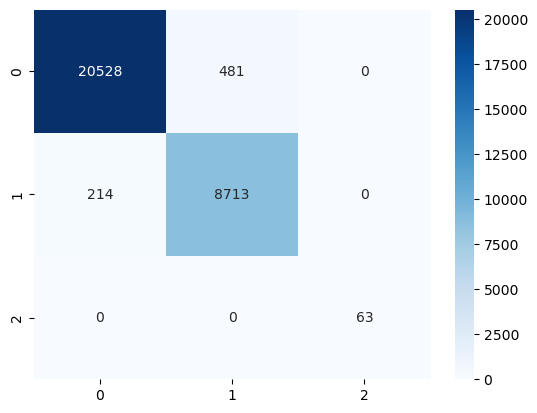

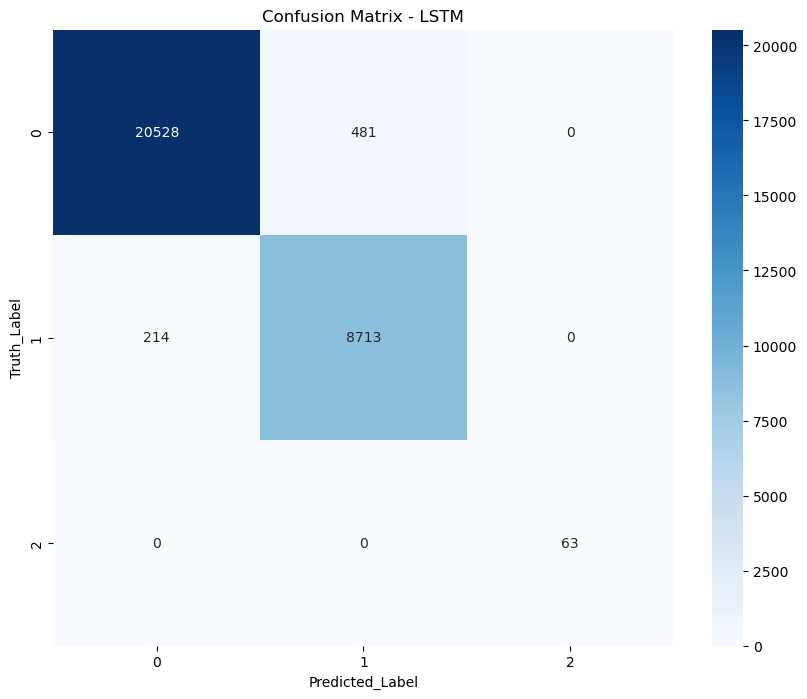

In [10]:
# Long Short-Term Memory

x_train, y_train = create_sequences(x_train, y_train, sequence_length)
x_test, y_test = create_sequences(x_test, y_test, sequence_length)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Converting labels to one-hot encoding for both training and testing data
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Defining the model
model = Sequential()
model.add(LSTM(units = 50, input_shape = (sequence_length, x_train.shape[2])))
model.add(Dense(units = num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start = time.time()

# Training the model
history = model.fit(x_train, y_train_encoded, epochs = 10, batch_size = 16, validation_data = (x_test, y_test_encoded))

end = time.time()

print("Time consumed to fit model is ", end - start)

# Predicting by using the trained model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Generating the Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)
print(classification_report(y_true, y_pred_classes, zero_division = 0))

# Plotting the Confusion Matrix
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.figure(figsize = (10, 8))
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - LSTM')
plt.show()

Epoch 1/10
4375/4375 [==============================] - 46s 10ms/step - loss: 0.0799 - accuracy: 0.9708 - val_loss: 0.0477 - val_accuracy: 0.9822
Epoch 2/10
4375/4375 [==============================] - 33s 8ms/step - loss: 0.0332 - accuracy: 0.9877 - val_loss: 0.0504 - val_accuracy: 0.9805
Epoch 3/10
4375/4375 [==============================] - 33s 8ms/step - loss: 0.0260 - accuracy: 0.9906 - val_loss: 0.0628 - val_accuracy: 0.9746
Epoch 4/10
4375/4375 [==============================] - 33s 8ms/step - loss: 0.0229 - accuracy: 0.9915 - val_loss: 0.0545 - val_accuracy: 0.9788
Epoch 5/10
4375/4375 [==============================] - 34s 8ms/step - loss: 0.0208 - accuracy: 0.9921 - val_loss: 0.0562 - val_accuracy: 0.9787
Epoch 6/10
4375/4375 [==============================] - 34s 8ms/step - loss: 0.0196 - accuracy: 0.9925 - val_loss: 0.0536 - val_accuracy: 0.9822
Epoch 7/10
4375/4375 [==============================] - 34s 8ms/step - loss: 0.0185 - accuracy: 0.9929 - val_loss: 0.0581 - val_a

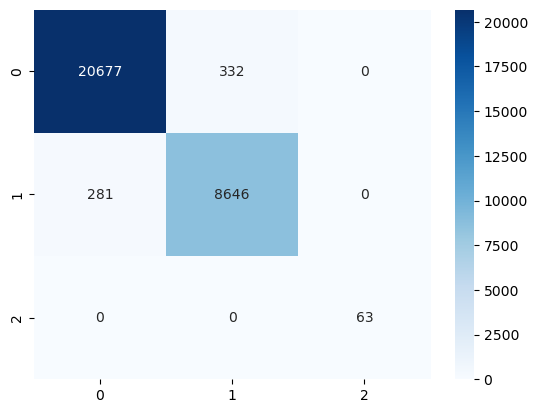

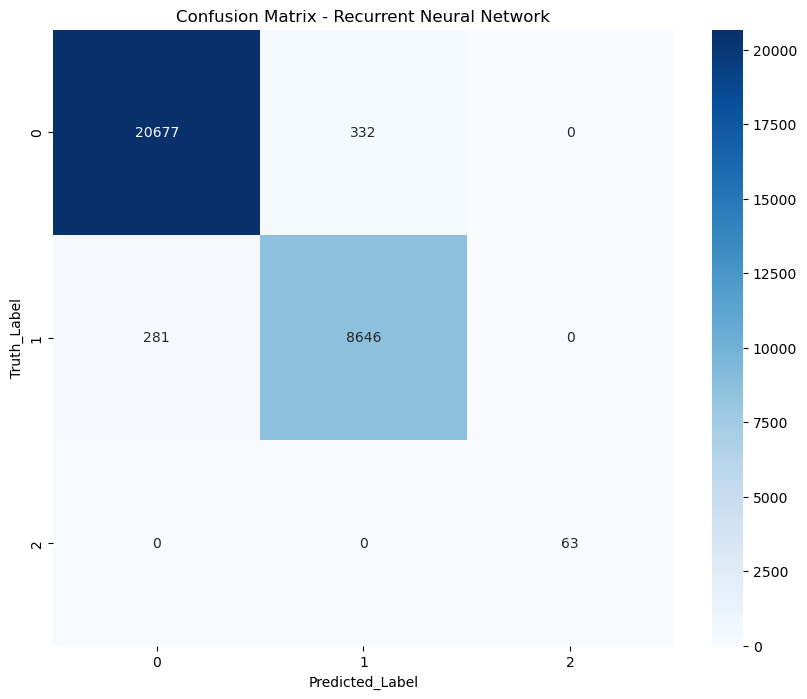

In [10]:
# Recurrent Neural Network

x_train, y_train = create_sequences(x_train, y_train, sequence_length)
x_test, y_test = create_sequences(x_test, y_test, sequence_length)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Converting labels to one-hot encoding for both training and testing data
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Defining the model 
model = Sequential()
model.add(SimpleRNN(units = 50, input_shape = (sequence_length, x_train.shape[2])))
model.add(Dense(units = num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start = time.time()

# Training the model
history = model.fit(x_train, y_train_encoded, epochs = 10, batch_size = 16, validation_data = (x_test, y_test_encoded))

end = time.time()

print("Time consumed to fit model is ", end - start)

# Predicting by using the trained model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Generating the Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)
print(classification_report(y_true, y_pred_classes, zero_division = 0))

# Plotting the Confusion Matrix
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.figure(figsize = (10, 8))
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Recurrent Neural Network')
plt.show()

Epoch 1/10
4375/4375 [==============================] - 25s 5ms/step - loss: 0.3651 - accuracy: 0.7836 - val_loss: 0.3348 - val_accuracy: 0.7877
Epoch 2/10
4375/4375 [==============================] - 15s 3ms/step - loss: 0.3161 - accuracy: 0.7964 - val_loss: 0.3286 - val_accuracy: 0.7888
Epoch 3/10
4375/4375 [==============================] - 15s 3ms/step - loss: 0.3012 - accuracy: 0.8067 - val_loss: 0.3337 - val_accuracy: 0.7865
Epoch 4/10
4375/4375 [==============================] - 17s 4ms/step - loss: 0.2924 - accuracy: 0.8119 - val_loss: 0.3439 - val_accuracy: 0.7879
Epoch 5/10
4375/4375 [==============================] - 20s 5ms/step - loss: 0.2852 - accuracy: 0.8136 - val_loss: 0.3552 - val_accuracy: 0.7863
Epoch 6/10
4375/4375 [==============================] - 20s 5ms/step - loss: 0.2788 - accuracy: 0.8198 - val_loss: 0.3607 - val_accuracy: 0.7846
Epoch 7/10
4375/4375 [==============================] - 20s 4ms/step - loss: 0.2728 - accuracy: 0.8247 - val_loss: 0.3673 - val_ac

Text(0.5, 1.0, 'Confusion Matrix - Convolutional Neural Network')

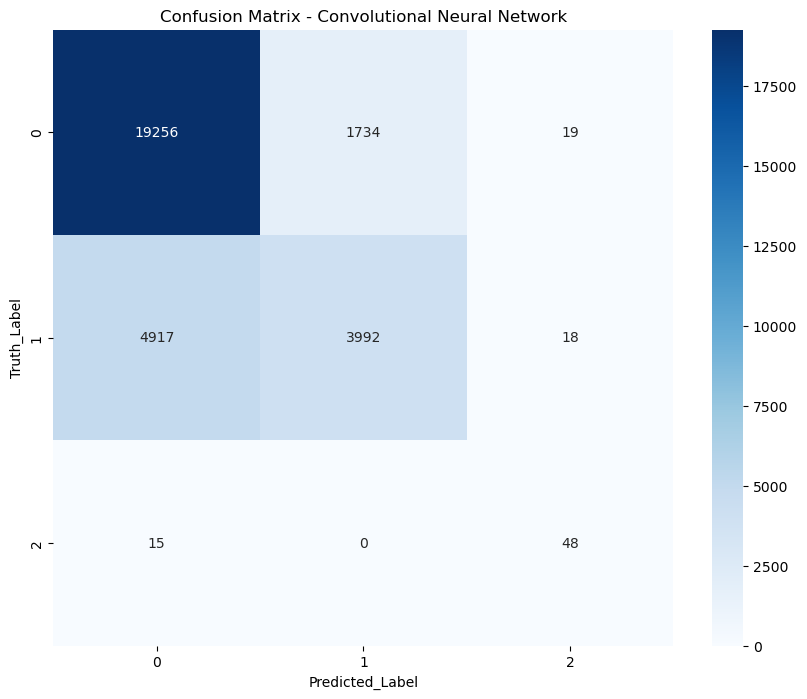

In [9]:
# Convolutional Neural Network - 1D

x_train, y_train = create_sequences(x_train, y_train, sequence_length)
x_test, y_test = create_sequences(x_test, y_test, sequence_length)

num_features = x_train.shape[-1]

# Reshaping the data 
x_train_cnn = x_train.reshape(-1, sequence_length, num_features)
x_test_cnn = x_test.reshape(-1, sequence_length, num_features)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Converting labels to one-hot encoding for both training and testing data
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Defining the model 
model = Sequential()
model.add(Conv1D(32, kernel_size = 1, activation = 'relu', input_shape = (sequence_length, num_features)))
model.add(MaxPooling1D(pool_size = 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start = time.time()

history = model.fit(x_train_cnn, y_train_encoded, epochs = 10, batch_size = 16,
                    validation_data = (x_test_cnn, y_test_encoded))

end = time.time()

print("Time consumed to fit CNN model is ", end - start)

# Predicting by using the trained model
y_pred = model.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Generating the Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, zero_division = 0))

# Plotting the Confusion Matrix
plt.figure(figsize = (10, 8))
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Convolutional Neural Network')

Epoch 1/10
4375/4375 [==============================] - 42s 9ms/step - loss: 0.0709 - accuracy: 0.9735 - val_loss: 0.0464 - val_accuracy: 0.9818
Epoch 2/10
4375/4375 [==============================] - 30s 7ms/step - loss: 0.0278 - accuracy: 0.9900 - val_loss: 0.0480 - val_accuracy: 0.9808
Epoch 3/10
4375/4375 [==============================] - 30s 7ms/step - loss: 0.0179 - accuracy: 0.9933 - val_loss: 0.0467 - val_accuracy: 0.9841
Epoch 4/10
4375/4375 [==============================] - 30s 7ms/step - loss: 0.0128 - accuracy: 0.9954 - val_loss: 0.0511 - val_accuracy: 0.9852
Epoch 5/10
4375/4375 [==============================] - 30s 7ms/step - loss: 0.0096 - accuracy: 0.9963 - val_loss: 0.0606 - val_accuracy: 0.9790
Epoch 6/10
4375/4375 [==============================] - 30s 7ms/step - loss: 0.0072 - accuracy: 0.9973 - val_loss: 0.0684 - val_accuracy: 0.9751
Epoch 7/10
4375/4375 [==============================] - 30s 7ms/step - loss: 0.0056 - accuracy: 0.9978 - val_loss: 0.0760 - val_ac

Text(0.5, 1.0, 'Confusion Matrix - Convolutional Neural Network')

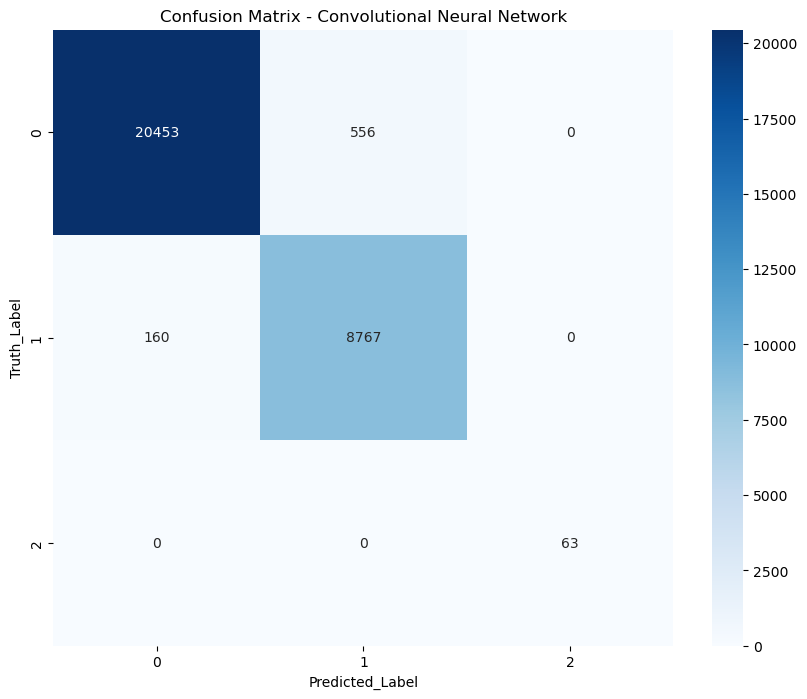

In [10]:
# Convolutional Neural Network - 2D

x_train, y_train = create_sequences(x_train, y_train, sequence_length)
x_test, y_test = create_sequences(x_test, y_test, sequence_length)

num_features = x_train.shape[-1]

# Reshaping the data 
x_train_cnn = x_train.reshape(-1, 1, sequence_length, num_features)
x_test_cnn = x_test.reshape(-1, 1, sequence_length, num_features)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Converting labels to one-hot encoding for both training and testing data
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Defining the model
model = Sequential()
model.add(Conv2D(32, kernel_size = (1, 2), activation = 'relu', input_shape = (1, sequence_length, num_features)))
model.add(MaxPooling2D(pool_size = (1, 1)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start = time.time()

history = model.fit(x_train_cnn, y_train_encoded, epochs = 10, batch_size = 16, 
                    validation_data = (x_test_cnn, y_test_encoded))

end = time.time()

print("Time consumed to fit CNN model is ", end - start)

# Predicting by using the trained model
y_pred = model.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Generating the Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)

print("Classification Report - CNN:")
print(classification_report(y_true, y_pred_classes, zero_division = 0))

# Plotting the Confusion Matrix
plt.figure(figsize = (10, 8))
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Convolutional Neural Network')